# Introducing Python: Lab I

**GOALS**

- Use variables and lists 
- Use for loops to make lists
- Plot the results of sequence generation
- Determine summations using `sympy` and symbolic computation

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/0ynBtb9NZg8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [2]:
a = [1, 2, 3, 4, 5]

In [3]:
a

[1, 2, 3, 4, 5]

In [4]:
a[3]

4

In [5]:
a[1:4]

[2, 3, 4]

In [6]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [7]:
a = [1]
for i in range(10):
    next = a[i]+1
    a.append(next)

In [8]:
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
a_partials = np.cumsum(a)

In [10]:
a_partials

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

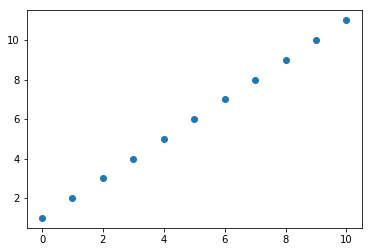

In [11]:
plt.plot(a, 'o')

In [12]:
plt.plot?

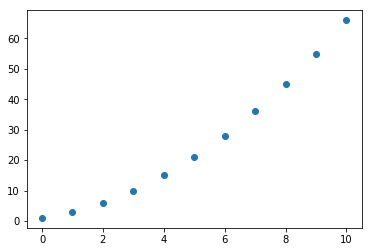

In [13]:
plt.plot(a_partials, 'o')

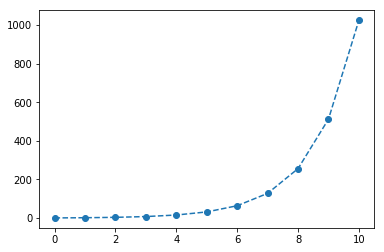

In [14]:
a = [1]
for i in range(10):
    next = a[i]*2
    a.append(next)
    
plt.plot(a, '--o')

### Symbolic Summations

We can use `sympy` to evaluate formulas for our summations.  To do so we first have to declare our symbols.  Next, we use the `summation` method of Sympy to evaluate the summations.

In [15]:
x, n = sy.symbols('x n')

In [16]:
sy.summation(x, (x, 1, n))

n**2/2 + n/2

In [17]:
sy.pprint(sy.summation(x, (x, 1, n)))

 2    
n    n
── + ─
2    2


In [18]:
sy.pprint(sy.summation(x**3, (x, 1, n)))

 4    3    2
n    n    n 
── + ── + ──
4    2    4 


### Approximating Areas

To see how to use these ideas to solve a calculus problem, let us consider approximating the area under the curve

$$g(x) = x^2 \quad \text{from} \quad x=-3 ~ \text{to}~ x = 3$$

using 6 rectangles.  Recall our formula we developed in class

$$\text{AREA} \approx \frac{b-a}{n} \sum_{i=0}^n f(a + i\frac{b-a}{n})$$

In [19]:
width = (3-(-3))/6

In [20]:
x = [-3 + i*width for i in range(6)]

In [21]:
x

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0]

In [22]:
x = [-3]
for i in range(5):
    next = x[i] + width
    x.append(next)

In [23]:
x

[-3, -2.0, -1.0, 0.0, 1.0, 2.0]

In [24]:
heights = [i**2 for i in x]

In [25]:
heights

[9, 4.0, 1.0, 0.0, 1.0, 4.0]

In [26]:
areas = [i*width for i in heights]

In [27]:
areas

[9.0, 4.0, 1.0, 0.0, 1.0, 4.0]

In [28]:
sum(areas)

19.0

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,1,'Approximating Areas')

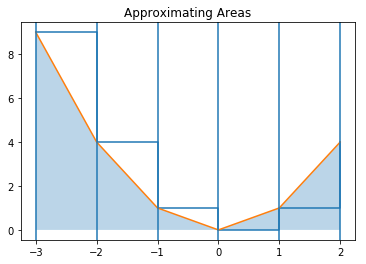

In [30]:
plt.step(x, heights, where = 'post')
plt.plot(x, heights)
plt.fill_between(x, heights, alpha = 0.3)
for i in x:
    plt.axvline(i)
plt.title("Approximating Areas")